In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
scaler = StandardScaler()

In [4]:
df = pd.read_csv('forecast_influence.csv')

In [5]:
df=df.values
df

array([[  0.00000000e+00,   1.00000000e+00,   5.00000000e+00, ...,
          7.40000000e+00,   3.00000000e+01,   1.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   6.00000000e+00, ...,
          7.40000000e+00,   3.00000000e+01,   1.00000000e+00],
       [  2.00000000e+00,   0.00000000e+00,   6.00000000e+00, ...,
          7.40000000e+00,   3.00000000e+01,   1.00000000e+00],
       ..., 
       [  5.91100000e+03,   1.00000000e+00,   2.00000000e+00, ...,
          4.05000000e+00,   3.20000000e+01,   1.00000000e+00],
       [  5.91200000e+03,   1.00000000e+00,   2.00000000e+00, ...,
          4.05000000e+00,   3.20000000e+01,   1.00000000e+00],
       [  5.91300000e+03,   1.00000000e+00,   3.00000000e+00, ...,
          1.71666667e+00,   3.20000000e+01,   2.00000000e+00]])

In [6]:
df=df[:,1:]

In [7]:
weather=df[:,:-4]
influence=df[:,-4:]

In [8]:
weather

array([[  1.,   5.,  25., ...,   1.,   1.,   0.],
       [  0.,   6.,  40., ...,   1.,   1.,   0.],
       [  0.,   6.,  40., ...,   1.,   1.,   0.],
       ..., 
       [  1.,   2.,  40., ...,   1.,   0.,   0.],
       [  1.,   2.,  40., ...,   1.,   0.,   0.],
       [  1.,   3.,  40., ...,   1.,   0.,   0.]])

In [9]:
weather.shape

(5914, 10)

In [10]:
weather=StandardScaler().fit_transform(weather)

In [11]:
weather

array([[ 1.35215081, -1.01514804, -0.73704314, ...,  1.38999185,
         2.65036287, -0.13830415],
       [-0.73956248, -0.68543016, -0.49772607, ...,  1.38999185,
         2.65036287, -0.13830415],
       [-0.73956248, -0.68543016, -0.49772607, ...,  1.38999185,
         2.65036287, -0.13830415],
       ..., 
       [ 1.35215081, -2.00430166, -0.49772607, ...,  1.38999185,
        -0.37730683, -0.13830415],
       [ 1.35215081, -2.00430166, -0.49772607, ...,  1.38999185,
        -0.37730683, -0.13830415],
       [ 1.35215081, -1.67458378, -0.49772607, ...,  1.38999185,
        -0.37730683, -0.13830415]])

In [12]:
sc=[]
for i in range(2,30):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(weather)
    silhouette_avg = silhouette_score(weather, kmeans.labels_)
    sc.append(silhouette_avg)

In [13]:
sc

[0.36299252943304727,
 0.384180745132846,
 0.40505273296739064,
 0.43297936741151866,
 0.40373632994464392,
 0.41421289471581296,
 0.38855921354073264,
 0.36125881616516092,
 0.37710375772936983,
 0.38075989943077715,
 0.3708649583002146,
 0.37207126986092209,
 0.36111752647750706,
 0.36639299218931609,
 0.37292147110561735,
 0.37669522091707841,
 0.36257958915613314,
 0.37202298605813156,
 0.37293018325726551,
 0.36370112443136199,
 0.34562205543328078,
 0.36186645295777181,
 0.37335653032525873,
 0.34762151461031859,
 0.35633829293507224,
 0.34416912908583591,
 0.36946681667642278,
 0.36484833397169547]

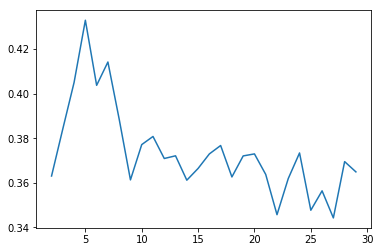

In [14]:
x_a=range(2,len(sc)+2)
plt.plot(x_a,sc)
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(weather)

In [16]:
labels=kmeans.labels_
np.round_(labels)

array([2, 2, 2, ..., 4, 4, 1], dtype=int32)

In [17]:
labels

array([2, 2, 2, ..., 4, 4, 1], dtype=int32)

In [18]:
#kmeans.cluster_centers_

In [19]:
np.savetxt("influence.csv", influence, delimiter=",")
np.savetxt("weather.csv", weather, delimiter=",")

In [20]:
influence_cluster=np.c_[influence,labels]

In [21]:
influence_cluster

array([[  0.        ,   7.4       ,  30.        ,   1.        ,   2.        ],
       [  0.        ,   7.4       ,  30.        ,   1.        ,   2.        ],
       [  0.        ,   7.4       ,  30.        ,   1.        ,   2.        ],
       ..., 
       [  0.        ,   4.05      ,  32.        ,   1.        ,   4.        ],
       [  0.        ,   4.05      ,  32.        ,   1.        ,   4.        ],
       [  1.        ,   1.71666667,  32.        ,   2.        ,   1.        ]])

In [22]:
np.save("kmean_result",influence_cluster)